In [2]:
import os, sys
sys.path.append("..")

In [3]:
import numpy as np
from opttrot.hamiltonian import Hamiltonian
from qiskit.quantum_info import SparsePauliOp

def get_test_hermit(qubits, tol= 0.5):
    ndim = int(2**qubits)
    A = np.random.rand(ndim, ndim)
    A[A<tol] = 0.
    H = A + 1j*A
    H = H.conj()@H
    return H

In [4]:
# Sample Hamiltonian
qubit = 3
H = get_test_hermit(qubit, tol=0.9)

In [5]:
hamiltonian = Hamiltonian.from_matrix(H)

In [6]:
hamiltonian

PauliPoly(terms:48)[
((0.21278191898517582+0j), 'III'),
((0.2250839886623124+0j), 'IIX'),
((0.22121853935547203+0j), 'IXI'),
((0.2340083755314255+0j), 'IXX'),
((0.46854411096657567+4.0807652965269294e-19j), 'XII'),
((0.22693322882197164-1.9998375930878857e-18j), 'XXI'),
(-0.2250839886623124j, 'IIY'),
((0.21278191898517582+0j), 'IIZ'),
(-0.2340083755314255j, 'IXY'),
((0.22121853935547203+0j), 'IXZ'),
((0.0033177619843414163+4.0807652965269294e-19j), 'XIZ'),
((0.22693322882197164-1.9998375930878857e-18j), 'XXZ'),
(-0.22121853935547203j, 'IYI'),
(-0.2340083755314255j, 'IYX'),
((-0.21278191898517582+0j), 'IZI'),
((-0.2250839886623124+0j), 'IZX'),
((1.9998375930878857e-18+0.22693322882197164j), 'XYI'),
((0.0033177619843413886+4.0807652965269294e-19j), 'XZI'),
((-0.2340083755314255+0j), 'IYY'),
(-0.22121853935547203j, 'IYZ'),
(0.2250839886623124j, 'IZY'),
((-0.21278191898517582+0j), 'IZZ'),
((1.9998375930878857e-18+0.22693322882197164j), 'XYZ'),
((0.46854411096657567+4.0807652965269294e-19j)

In [7]:
hamiltonian.local_decomposition

,Pstring,type,Z,X,Coef
0,III,0,0,0,0.212782+0.000000j
1,IIX,2,0,1,0.225084+0.000000j
2,IXI,2,0,2,0.221219+0.000000j
3,IXX,2,0,3,0.234008+0.000000j
4,XII,2,0,4,0.468544+0.000000j
5,XXI,2,0,6,0.226933-0.000000j
6,IIY,3,1,1,0.000000-0.225084j
7,IIZ,1,1,0,0.212782+0.000000j
8,IXY,3,1,3,0.000000-0.234008j
9,IXZ,3,1,2,0.221219+0.000000j


In [8]:
hamiltonian.edge_df

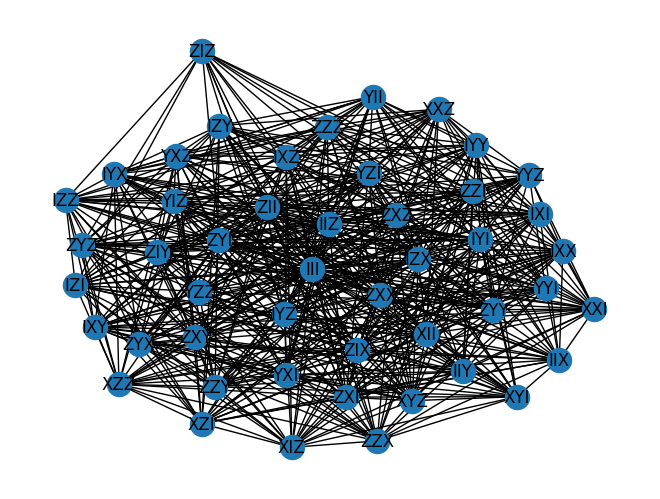

In [9]:
hamiltonian.draw_graph(with_labels=True)

In [10]:
from networkx.algorithms import find_cliques

In [11]:
g = hamiltonian.compatible_graph

In [12]:
list(find_cliques(g))

[['III', 'XXZ', 'IYX', 'YYI', 'ZXY', 'ZZZ'],
 ['III', 'XXZ', 'IYX', 'IZY', 'XII', 'IXZ'],
 ['III', 'XXZ', 'IYX', 'ZIX', 'YZZ', 'ZYI'],
 ['III', 'XXZ', 'IZY', 'ZYZ', 'ZXX', 'YZI'],
 ['III', 'XXZ', 'IZY', 'ZIY', 'ZZI', 'YYZ'],
 ['III', 'XXZ', 'ZIY', 'IYY', 'YZZ', 'ZYI'],
 ['III', 'XXZ', 'ZIY', 'XIZ', 'ZXY', 'IXI'],
 ['III', 'XXZ', 'IYY', 'YYI', 'ZXX', 'ZZZ'],
 ['III', 'XXZ', 'IYY', 'XII', 'IZX', 'IXZ'],
 ['III', 'XXZ', 'ZXX', 'ZIX', 'XIZ', 'IXI'],
 ['III', 'XXZ', 'ZIX', 'ZZI', 'IZX', 'YYZ'],
 ['III', 'XXZ', 'ZXY', 'ZYZ', 'IZX', 'YZI'],
 ['III', 'XXZ', 'XXI', 'IIZ', 'YYI', 'ZZI', 'ZZZ', 'YYZ'],
 ['III', 'XXZ', 'XXI', 'IIZ', 'ZYZ', 'YZZ', 'ZYI', 'YZI'],
 ['III', 'XXZ', 'XXI', 'IIZ', 'XIZ', 'IXI', 'XII', 'IXZ'],
 ['III', 'YYI', 'IIX', 'IYI', 'YII', 'IYX'],
 ['III', 'YYI', 'IIX', 'ZZI', 'XXI', 'ZZX'],
 ['III', 'YYI', 'IIX', 'XZI', 'ZXX', 'ZXI'],
 ['III', 'YYI', 'IYX', 'ZZY', 'XZZ', 'ZXZ'],
 ['III', 'YYI', 'IYY', 'IYI', 'YII', 'IIY'],
 ['III', 'YYI', 'IYY', 'XZZ', 'ZZX', 'ZXZ'],
 ['III', 'YYI

In [26]:
hamiltonian.edge_df[hamiltonian.edge_df["commute"]==1]

,source,target,Zs,Xs,Zt,Xt,commute
0,III,IXX,0,0,0,3,1
1,III,XII,0,0,0,4,1
2,III,XXI,0,0,0,6,1
3,III,IIZ,0,0,1,0,1
4,III,IXY,0,0,1,3,1
...,...,...,...,...,...,...,...
368,YZI,ZYX,6,4,6,3,1
370,YZI,YZZ,6,4,7,4,1
371,YZI,ZYY,6,4,7,3,1
372,ZYX,YYZ,6,3,7,6,1


In [23]:
hamiltonian.edge_df["commute"]==1

0       True
1       True
2       True
3       True
4       True
       ...  
373    False
374    False
375    False
376     True
377    False
Name: commute, Length: 378, dtype: bool

In [6]:
spa = SparsePauliOp.from_operator(H)

63.2 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


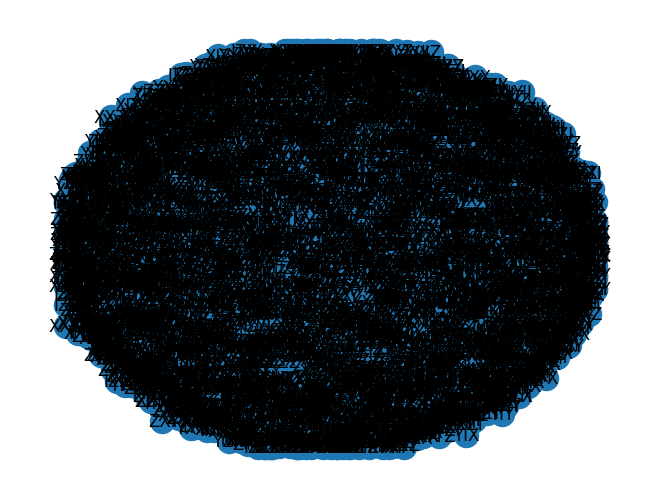

In [13]:
%%timeit
hamiltonian.draw_graph(with_labels=True)

In [9]:
import rustworkx as rx

In [10]:
g = spa.noncommutation_graph(False)

1.61 s ± 57.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


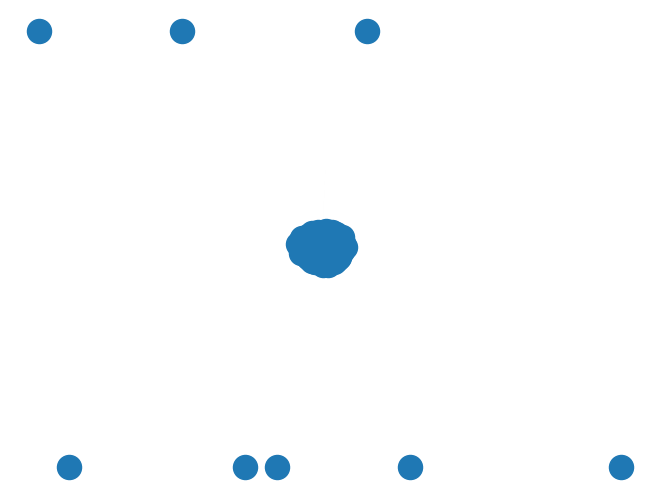

In [12]:
%%timeit
rx.visualization.mpl_draw(g)